In [206]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt

df = pd.read_csv('customer_segmentation.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [207]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [208]:
df.shape

(2240, 29)

In [209]:
df.info

<bound method DataFrame.info of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012    

In [210]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [211]:
df.dropna(inplace = True)

In [212]:
df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [213]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [214]:
df['dt_customer'] = pd.to_datetime(df['Dt_Customer'],dayfirst = True)

In [215]:
df['age'] = 2025 - df['Year_Birth']

In [216]:
df['age']

0       68
1       71
2       60
3       41
4       44
        ..
2235    58
2236    79
2237    44
2238    69
2239    71
Name: age, Length: 2216, dtype: int64

In [217]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dt_customer,age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,2012-09-04,68
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,2014-03-08,71
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,2013-08-21,60
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,2014-02-10,41
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,2014-01-19,44


In [218]:
df['total_children'] = df['Kidhome'] + df['Teenhome']

In [219]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'dt_customer', 'age', 'total_children'],
      dtype='object')

In [220]:
spend_cols = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']
df['total_spending'] = df[spend_cols].sum(axis=1)

In [221]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')


In [222]:
df['customer_since'] = pd.Timestamp.today() - df['Dt_Customer']


In [223]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'dt_customer', 'age', 'total_children', 'total_spending',
       'customer_since'],
      dtype='object')

In [224]:
import matplotlib.pyplot as plt

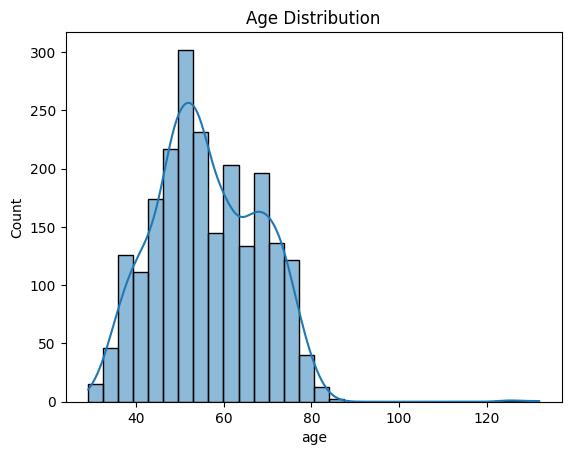

In [225]:
sns.histplot(df['age'],bins = 30, kde =True)
plt.title("Age Distribution")
plt.show()

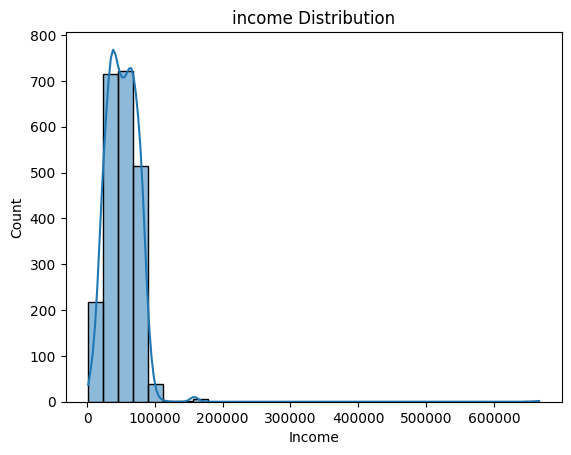

In [226]:
sns.histplot(df['Income'],bins = 30, kde =True)
plt.title("income Distribution")
plt.show()

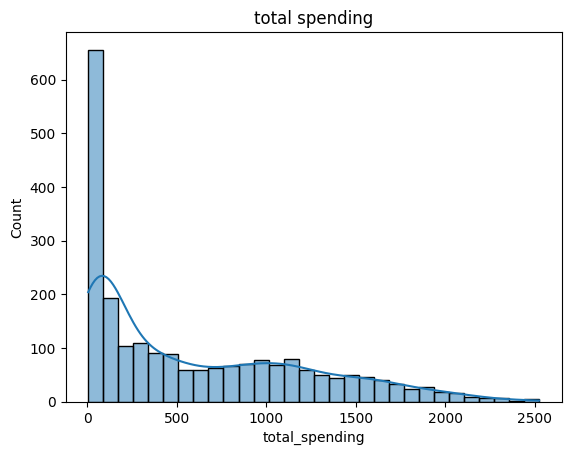

In [227]:
sns.histplot(df['total_spending'],bins = 30, kde =True)
plt.title("total spending")
plt.show()

In [228]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'dt_customer', 'age', 'total_children', 'total_spending',
       'customer_since'],
      dtype='object')

In [229]:
pivot_income = df.pivot_table(values= 'Income',index= 'age',columns= 'Marital_Status')
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
age,,,,,,,,
29,NaN,NaN,NaN,10960.500000,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,60937.000000,NaN,NaN,NaN
31,NaN,NaN,NaN,NaN,95529.000000,80409.500000,NaN,NaN
32,79244.0,NaN,NaN,NaN,72863.750000,NaN,NaN,NaN
33,NaN,NaN,NaN,43531.500000,44445.833333,60330.333333,NaN,NaN
34,NaN,NaN,NaN,47032.000000,63554.777778,61862.000000,NaN,NaN
35,NaN,NaN,NaN,32371.000000,54352.285714,NaN,NaN,NaN
36,NaN,NaN,10979.000000,43841.700000,40966.090909,52375.500000,NaN,NaN
37,NaN,34176.0,35388.000000,53133.416667,46522.600000,43618.800000,NaN,NaN


In [230]:
group1 = df.groupby('Education')['Income'].mean().sort_values(ascending=False)
group1 = group1.astype(int)
group1

Education
PhD           56145
Master        52917
Graduation    52720
2n Cycle      47633
Basic         20306
Name: Income, dtype: int64

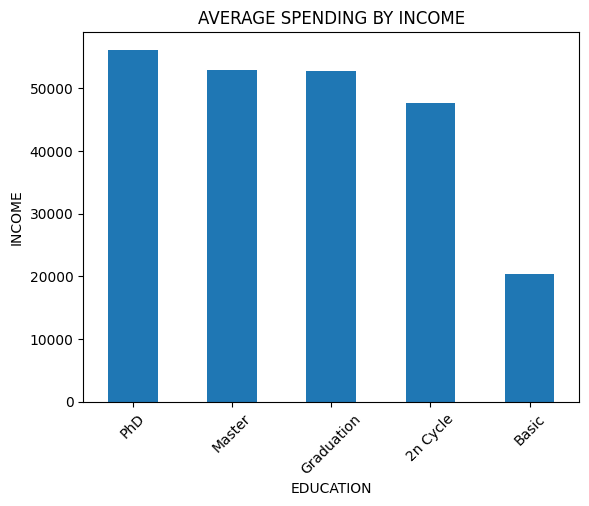

In [231]:
group1.plot(kind = 'bar')
plt.title("AVERAGE SPENDING BY INCOME")
plt.xlabel('EDUCATION')
plt.ylabel('INCOME')
plt.xticks(rotation = 45)
plt.show()


In [232]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'dt_customer', 'age', 'total_children', 'total_spending',
       'customer_since'],
      dtype='object')

In [233]:
df['acceptedany'] = df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].sum(axis=1)


In [234]:
df['acceptedany'].unique()

array([0, 1, 2, 3, 4])

In [235]:
df['accepted'] = (df['acceptedany'] > 0).astype(int)
 


In [236]:
group2 = df.groupby('Marital_Status')['acceptedany'].mean().sort_values(ascending=False)
group2

Marital_Status
Absurd      1.000000
Widow       0.355263
Alone       0.333333
Married     0.303384
Divorced    0.293103
Together    0.291449
Single      0.288747
YOLO        0.000000
Name: acceptedany, dtype: float64

In [237]:
bins = [18,30,40,50,60,70,80,90]
lables = ["18-29","30-39","40-49","50-59","60-69","70-79","80-89"]
df["age_groups"] = pd.cut(df['age'], bins = bins, labels = lables)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,dt_customer,age,total_children,total_spending,customer_since,acceptedany,accepted,age_groups
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,11,1,2012-09-04,68,0,1617,5011 days 18:03:46.290564,0,0,60-69
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,11,0,2014-03-08,71,2,27,4165 days 18:03:46.290564,0,0,70-79
2,4141,1965,Graduation,Together,71613.0,0,0,NaT,26,426,...,11,0,2013-08-21,60,0,776,NaT,0,0,50-59
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,11,0,2014-02-10,41,1,53,4105 days 18:03:46.290564,0,0,40-49
4,5324,1981,PhD,Married,58293.0,1,0,NaT,94,173,...,11,0,2014-01-19,44,1,422,NaT,0,0,40-49


In [238]:
group3 = df.groupby('age_groups')['Income'].mean().sort_values(ascending=False)
group3.astype(int)

C:\Users\Sys\AppData\Local\Temp\ipykernel_14208\918501116.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3 = df.groupby('age_groups')['Income'].mean().sort_values(ascending=False)


age_groups
80-89    65563
70-79    58611
60-69    56200
50-59    50812
40-49    49224
18-29    46658
30-39    46283
Name: Income, dtype: int64

In [239]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'dt_customer', 'age', 'total_children', 'total_spending',
       'customer_since', 'acceptedany', 'accepted', 'age_groups'],
      dtype='object')

In [240]:
features = ['age','Income',"total_spending",'NumWebPurchases','NumStorePurchases','NumWebVisitsMonth','Recency']

 

In [241]:
x = df[features].copy()
x

,age,Income,total_spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,68,58138.0,1617,8,4,7,58
1,71,46344.0,27,1,2,5,38
2,60,71613.0,776,8,10,4,26
3,41,26646.0,53,2,4,6,26
4,44,58293.0,422,5,6,5,94
...,...,...,...,...,...,...,...
2235,58,61223.0,1341,9,4,5,46
2236,79,64014.0,444,8,5,7,56
2237,44,56981.0,1241,2,13,6,91
2238,69,69245.0,843,6,10,3,8


In [242]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.98644293,  0.2340627 ,  1.67548812, ..., -0.55414289,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.96235832, ..., -1.16951781,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.28024985, ...,  1.29198186,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.05169551, ...,  2.21504423,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.39140438, ...,  1.29198186,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.7218    , ..., -0.55414289,
         0.69323197, -0.31140528]], shape=(2216, 7))

In [243]:
from sklearn.cluster import KMeans

WCSS = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x_scaled)
    WCSS.append(kmeans.inertia_)

WCSS


[10218.62014374878,
 9303.349676497386,
 8159.355714963869,
 7578.2170651951255,
 7102.818964506339,
 6820.512393778452,
 6445.565381528361,
 6224.740490354583]

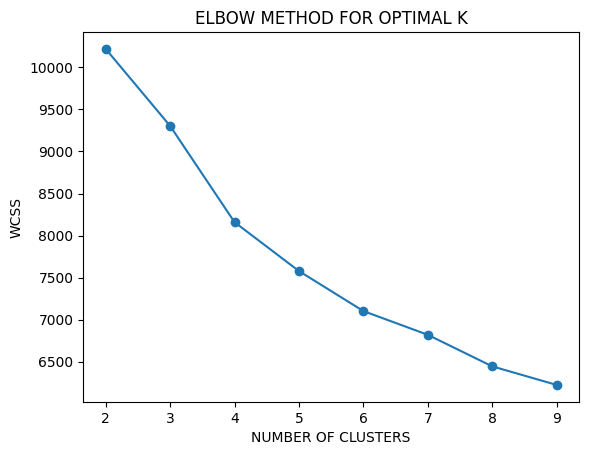

In [244]:
plt.plot(range(2,10),WCSS,marker = 'o')
plt.title("ELBOW METHOD FOR OPTIMAL K")
plt.xlabel("NUMBER OF CLUSTERS")
plt.ylabel("WCSS")
plt.show()

In [245]:
kmeans = KMeans(n_clusters=6)
df['clusters'] = kmeans.fit_predict(x_scaled)
df['clusters']

0       5
1       4
2       2
3       4
4       1
       ..
2235    2
2236    2
2237    5
2238    0
2239    1
Name: clusters, Length: 2216, dtype: int32

In [246]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,dt_customer,age,total_children,total_spending,customer_since,acceptedany,accepted,age_groups,clusters
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,1,2012-09-04,68,0,1617,5011 days 18:03:46.290564,0,0,60-69,5
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,2014-03-08,71,2,27,4165 days 18:03:46.290564,0,0,70-79,4
2,4141,1965,Graduation,Together,71613.0,0,0,NaT,26,426,...,0,2013-08-21,60,0,776,NaT,0,0,50-59,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,2014-02-10,41,1,53,4105 days 18:03:46.290564,0,0,40-49,4
4,5324,1981,PhD,Married,58293.0,1,0,NaT,94,173,...,0,2014-01-19,44,1,422,NaT,0,0,40-49,1


In [247]:
cluster_summary = df.groupby('clusters')[features].mean()
cluster_summary

,age,Income,total_spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
clusters,,,,,,,
0,70.072165,73867.969072,1169.663230,4.340206,8.240550,2.381443,53.522337
1,55.330206,36633.245779,133.086304,2.429644,3.484053,6.386492,75.200750
2,61.790476,56039.895238,675.292063,6.720635,6.612698,6.282540,25.184127
3,46.142857,79292.022727,1321.665584,4.538961,8.464286,2.542208,45.931818
4,51.097466,32355.042885,86.855750,1.904483,3.031189,6.621832,25.707602
5,57.511719,62836.574219,1053.222656,7.824219,9.199219,5.980469,69.089844


In [248]:
df['clusters'].value_counts()

clusters
1    533
4    513
2    315
3    308
0    291
5    256
Name: count, dtype: int64

In [249]:
from sklearn.decomposition import PCA

In [250]:
pca  = PCA(n_components = 2)
pcadata = pca.fit_transform(x_scaled)
df['pca1'],df['pca2'] = pcadata[:,0],pcadata[:,0]


In [251]:
import joblib
joblib.dump(kmeans,"kmean_model.pkl")
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']